<a href="https://colab.research.google.com/github/MikhailKuklin/time-series-analysis-forecasting/blob/main/notebook/ts_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prophet is Facebook forecasting library

* additive model with the following components:
    * yearly using Fourier series
    * weekly using dummy variables
    * user-provided list of important holidays
* automatically detect changes in trend




In [6]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 73 kB 2.3 MB/s 
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [8]:
# import libraries

from prophet import Prophet
import pandas as pd

In [16]:
# download data

df = pd.read_csv('espoo_2020_2022.csv',
                 parse_dates= {"date" : ["Year","m","d"]})

df.dropna(axis=0,inplace=True)

df = df.groupby(['date']).mean()

df.index.freq = "D"

#df = df.iloc[0:185].reset_index()

df = df.reset_index()

df.columns = ['ds','y']

df.head()

,ds,y
0,2020-01-01,1.991667
1,2020-01-02,4.129167
2,2020-01-03,4.754167
3,2020-01-04,2.120833
4,2020-01-05,-1.712500


In [37]:
len(df)

733

In [52]:
# split into train and test sets

train = df.iloc[:700]
test = df.iloc[700:]

In [53]:
# fit the model
m = Prophet()
m.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqvpo_wf5/ox6vliuc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqvpo_wf5/rg1de5qm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6149', 'data', 'file=/tmp/tmpqvpo_wf5/ox6vliuc.json', 'init=/tmp/tmpqvpo_wf5/rg1de5qm.json', 'output', 'file=/tmp/tmpysnwwzqg/prophet_model-20220809100729.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:07:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:07:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


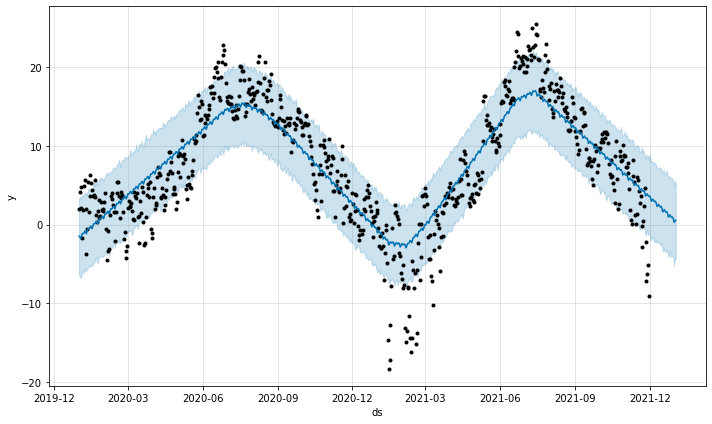

In [60]:
# forecasting

future = m.make_future_dataframe(periods=33,freq='D')

forecast = m.predict(future)

m.plot(forecast);

In [61]:
test.tail

<bound method NDFrame.tail of             ds          y
700 2021-12-01  -7.425000
701 2021-12-02  -8.341667
702 2021-12-03  -9.016667
703 2021-12-04  -8.454167
704 2021-12-05 -14.841667
705 2021-12-06 -13.150000
706 2021-12-07 -15.600000
707 2021-12-08 -15.258333
708 2021-12-09  -6.641667
709 2021-12-10  -1.791667
710 2021-12-11   0.362500
711 2021-12-12   0.891667
712 2021-12-13   1.425000
713 2021-12-14   2.562500
714 2021-12-15   3.258333
715 2021-12-16   3.325000
716 2021-12-17   1.029167
717 2021-12-18   2.804167
718 2021-12-19   0.066667
719 2021-12-20  -8.291667
720 2021-12-21 -11.650000
721 2021-12-22 -11.000000
722 2021-12-23  -1.270833
723 2021-12-24 -10.770833
724 2021-12-25 -11.058333
725 2021-12-26 -13.716667
726 2021-12-27 -14.795833
727 2021-12-28  -5.875000
728 2021-12-29  -3.625000
729 2021-12-30  -2.208333
730 2021-12-31   0.091667
731 2022-01-01  -5.354167
732 2022-01-02 -10.500000>

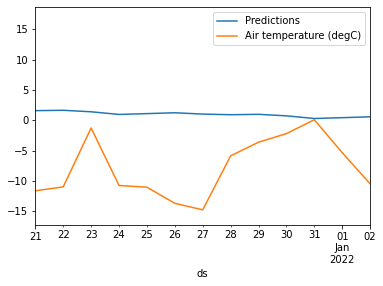

In [62]:
ax=forecast.plot(x='ds',y='yhat',label='Predictions')
test.plot(x='ds',y='y',label='Air temperature (degC)',ax=ax,legend=True,xlim=('2021-12-21','2022-01-02'))

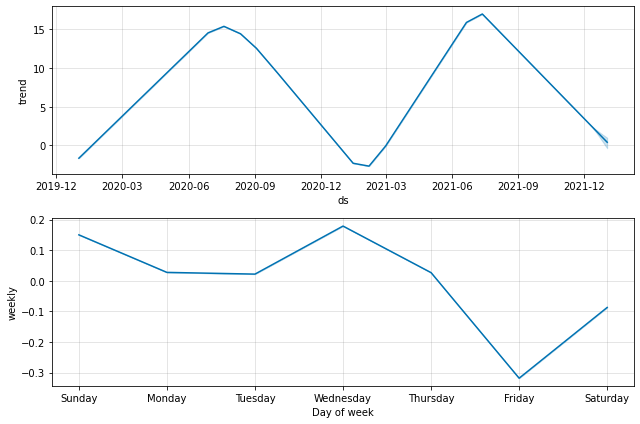

In [63]:
m.plot_components(forecast);

In [65]:
# evaluation

from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[-33:]['yhat']

rmse(predictions,test['y'])

10.084916963441865

In [66]:
test.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


y   -5.903662
dtype: float64

In [68]:
# model diagnostics

from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

# Initial 5 years training period
initial = 65
initial = str(initial) + ' days'
# Fold every year
period = 365
period = str(period) + ' days'
# Forecast 0.5 year into the future
horizon = 365/2
horizon = str(horizon) + ' days'

In [69]:
# CV

df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

df_cv.head()

INFO:prophet:Making 2 forecasts with cutoffs between 2020-05-31 12:00:00 and 2021-05-31 12:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqvpo_wf5/t_l4rpkf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqvpo_wf5/2wjjq22k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4713', 'data', 'file=/tmp/tmpqvpo_wf5/t_l4rpkf.json', 'init=/tmp/tmpqvpo_wf5/2wjjq22k.json', 'output', 'file=/tmp/tmp0tqwzmv8/prophet_model-20220809101159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:11:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:11:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqvpo_wf5/dn7ofxce.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqvpo_wf5/cmp0dkvr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packa

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-06-01,10.070832,6.511869,13.435420,11.337500,2020-05-31 12:00:00
1,2020-06-02,10.368984,6.830177,14.107521,11.470833,2020-05-31 12:00:00
2,2020-06-03,10.705418,7.348719,14.315733,12.929167,2020-05-31 12:00:00
3,2020-06-04,10.369353,6.818141,13.868661,13.950000,2020-05-31 12:00:00
4,2020-06-05,9.577429,5.898620,13.001125,13.770833,2020-05-31 12:00:00


In [70]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,17 days 12:00:00,33.640559,5.800048,5.451590,0.326100,0.341322,0.395918,0.305556
1,18 days 12:00:00,38.253528,6.184944,5.855317,0.341729,0.352245,0.417915,0.250000
2,19 days 12:00:00,41.510329,6.442851,6.142994,0.352096,0.361930,0.432057,0.222222
3,20 days 12:00:00,45.080018,6.714166,6.368253,0.357491,0.361930,0.440167,0.194444
4,21 days 12:00:00,47.994917,6.927836,6.528635,0.359349,0.361930,0.443547,0.194444
...,...,...,...,...,...,...,...,...
161,178 days 12:00:00,622.868207,24.957328,24.719456,57.263516,5.327301,1.541198,0.000000
162,179 days 12:00:00,645.108711,25.398990,25.087488,26.425915,5.352065,1.553051,0.000000
163,180 days 12:00:00,672.820064,25.938775,25.571571,26.276590,5.581402,1.576289,0.000000
164,181 days 12:00:00,703.607729,26.525605,26.122816,27.898046,5.813347,1.611605,0.000000


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


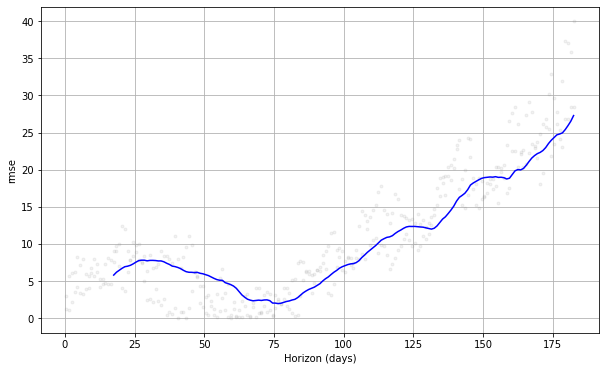

In [71]:
plot_cross_validation_metric(df_cv, metric='rmse');